In [ ]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [ ]:
import skimage 
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform

In [ ]:
skimage.__version__

'0.18.1'

In [ ]:
# Load data
data = pickle.load(open('dataprepare_machinelearning_pipeline/data_animals_head_20.pickle','rb'))

In [ ]:
data['description']

'there are 20 classes and 2057 images are there of 80 x 80 (rgb)'

In [ ]:
#split the data into independent and dependent

X = data['data']
y = data['target']

In [ ]:
print(X)
print(y)

In [ ]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

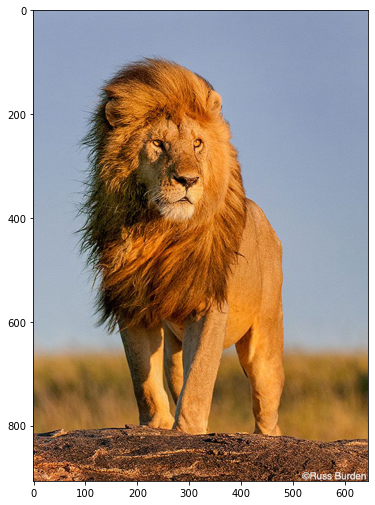

In [ ]:
img = skimage.io.imread('dataprepare_machinelearning_pipeline/Images/lion.bmp')
plt.figure(figsize=(6,10))
plt.imshow(img)

In [ ]:
# hog transformer
img_re = skimage.transform.rescale(img,1/3).reshape((302,215))
gray = skimage.color.rgb2gray(img)
feature_vector, hog_img= skimage.feature.hog(gray,orientations=7,
                                             pixels_per_cell=(30,30),
                                            cells_per_block=(2,2),
                                             visualize=True)

In [ ]:
gray.shape

(907, 645)

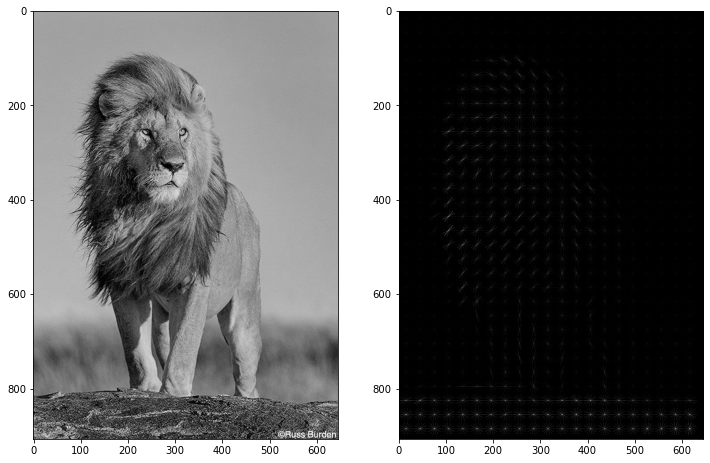

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class rgb2gray_transform(BaseEstimator, TransformerMixin):
    import skimage.color
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])
    

In [ ]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [ ]:
x_train_gray.shape

(1645, 80, 80)

In [ ]:
x_train.shape

(1645, 80, 80, 3)

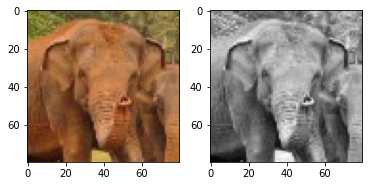

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x_train[10])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[10], cmap='gray')

In [ ]:
class hogtransformer(BaseEstimator, TransformerMixin):
    import skimage.feature
    def __init__(self,orientations = 9, pixels_per_cell=(8,8), cells_per_block=(3,3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features = skimage.feature.hog(img,orientations = self.orientations,
                                pixels_per_cell = self.pixels_per_cell,
                               cells_per_block=self.cells_per_block)
            return hog_features
        return np.array([local_hog(x) for x in X])

In [ ]:
hogt = hogtransformer()

In [ ]:
x_train_hog = hogt.fit_transform(x_train_gray)

In [ ]:
x_train_hog.shape

(1645, 5184)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
model_sgd = SGDClassifier(loss='hinge', learning_rate='adaptive',
                          early_stopping=True,eta0=0.1)

In [ ]:
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [ ]:
grayify  = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [ ]:
# Step 1 convert to grayscale
x_train_gray = grayify.fit_transform(x_train)

#Step 2 extract features
x_train_hog = hogify.fit_transform(x_train_gray)

#step 3 Normalization
x_train_scale = scalify.fit_transform(x_train_hog)

#Step 4 machine Learning
model_sgd.fit(x_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [ ]:
# Step 1 convert to grayscale
x_test_gray = grayify.fit_transform(x_test)

#Step 2 extract features
x_test_hog = hogify.fit_transform(x_test_gray)

#step 3 Normalization
x_test_scale = scalify.fit_transform(x_test_hog)

y_pred_test = model_sgd.predict(x_test_scale)

In [ ]:
y_pred_test

In [ ]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.500000,0.450000,0.473684,20.000000
cat,0.558824,0.593750,0.575758,32.000000
chicken,0.526316,0.500000,0.512821,20.000000
cow,0.500000,0.571429,0.533333,21.000000
deer,0.782609,0.857143,0.818182,21.000000
dog,0.318182,0.269231,0.291667,26.000000
duck,0.571429,0.571429,0.571429,21.000000
eagle,0.300000,0.300000,0.300000,20.000000
elephant,0.500000,0.600000,0.545455,20.000000
human,0.739130,0.850000,0.790698,20.000000


In [ ]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5049988172163498

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model_pipe = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,
                                  pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',
                         early_stopping=True,eta0=0.1))
])

In [ ]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(10, 10))),
                ('scale', StandardScaler()),
                ('sgd',
                 SGDClassifier(early_stopping=True, eta0=0.1,
                               learning_rate='adaptive'))])

In [ ]:
y_pred_test = model_pipe.predict(x_test)

In [ ]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.571429,0.400000,0.470588,20.000000
cat,0.714286,0.625000,0.666667,32.000000
chicken,0.473684,0.450000,0.461538,20.000000
cow,0.375000,0.428571,0.400000,21.000000
deer,0.700000,0.666667,0.682927,21.000000
dog,0.448276,0.500000,0.472727,26.000000
duck,0.800000,0.571429,0.666667,21.000000
eagle,0.555556,0.500000,0.526316,20.000000
elephant,0.454545,0.500000,0.476190,20.000000
human,0.739130,0.850000,0.790698,20.000000


In [ ]:
#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [ ]:
param_grid = [
    {
        'hogtransform__orientations' : [7,8,9,10],
        'hogtransform__pixels_per_cell'  : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate' : ['optimal']
        
    },
        {
        'hogtransform__orientations' : [7,8,9,10],
        'hogtransform__pixels_per_cell'  : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate' : ['adaptive'],
        'sgd__eta0' : [0.01,0.1]
        
    }
]

In [ ]:
model_grid = GridSearchCV(estimator,
                         param_grid=param_grid,scoring='accuracy',
                          n_jobs=1,cv=3,verbose=2)

In [ ]:
model_grid.fit(x_train,y_train)

In [ ]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 8,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [ ]:
model_grid.best_score_

0.7312909115888654

In [ ]:
model_best = model_grid.best_estimator_

In [ ]:
model_best

Pipeline(steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(cells_per_block=(2, 2), orientations=8)),
                ('scale', StandardScaler()), ('sgd', SGDClassifier())])

In [ ]:
y_pred = model_best.predict(x_test)

In [ ]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict = True)
pd.DataFrame(cr).T

C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atuld\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.666667,0.700000,0.682927,20.000000
cat,0.833333,0.937500,0.882353,32.000000
chicken,0.823529,0.700000,0.756757,20.000000
cow,0.761905,0.761905,0.761905,21.000000
deer,0.760000,0.904762,0.826087,21.000000
dog,0.500000,0.538462,0.518519,26.000000
duck,0.681818,0.714286,0.697674,21.000000
eagle,0.588235,0.500000,0.540541,20.000000
elephant,0.866667,0.650000,0.742857,20.000000
human,0.952381,1.000000,0.975610,20.000000


In [ ]:
#save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                         hogtransformer(orientations=10,
                         pixels_per_cell=(8,8),
                         cells_per_block=(2,2)))

In [ ]:
feature_vector = pipeline1.fit_transform(x_train)

In [ ]:
#standard Scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [ ]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [ ]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

In [ ]:
# Evaluate
feature_vector = pipeline1.fit_transform(x_train)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)


In [ ]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

In [ ]:
# save model for Flask App
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))
pickle.dump(scalar,open('dsa_scalar.pickle','wb'))